<img src="images/keepcoding.png" width=200 align="left">

<img src="images/me.jpg" width=150 align="right">

# Análisis del error y límites computacionales

Autor: Carlos Moreno Morera

Contacto: carlos.moreno@ibm.com

Última revisión: 11/Jul/2022

## 1.- Introducción
En muy pocas ocasiones la información de entrada que se suministra es exacta, pues se obtiene, en general, mediante instrumentos de medida; como, por otra parte, tanto el almacenamiento de los datos como el propio algoritmo de cálculo introducen también errores, la información de salida contendrá errores que provendrán de las tres fuentes, es decir, los errores de salida se producen debido a:
- Los errores de entrada
- Los errores de almacenamiento
- Los errores algorítmicos

Sobre el primer tipo de errores nada podemos decir: están relacionados con el diseño de los aparatos de medición o la precisión de la percepción a través de los órganos sensoriales. Analizaremos los otros dos tipos de errores. Antes de comenzar, recordemos cierta terminología estándar en el tratamiento de errores. El error cometido al calibrar cierta magnitud puede ser:
- **Error absoluto**: que viene dado por la fórmula $\lvert\widetilde{z}-z\rvert$ donde $\widetilde{z}$ es la aproximación de la cantidad $z$.
- **Error relativo**: que viene dado por la fórmula:
$$
\frac{\lvert\widetilde{z}-z\rvert}{\lvert z\rvert}
$$

Suele ser más relevante el error relativo, ya que depende de la magnitud que se está utilizando. Veamos un ejemplo:

In [1]:
#Calculamos el error absoluto cuando z = 0.007 cm y su aproximación es 0.257 cm
def error_absoluto(z_aprox, z):
    return abs(z_aprox - z)

z = .007 #También podemos escribir 7e-3
z_aprox = .257

print(f'El error absoluto es de {error_absoluto(z_aprox, z)}')

El error absoluto es de 0.25


In [2]:
#Calculamos el error relativo del ejemplo anterior
def error_relativo(z_aprox, z):
    return abs(z_aprox - z)/abs(z)

print(f'El error relativo es de {error_relativo(z_aprox, z)}')

El error relativo es de 35.714285714285715


El resultado anterior nos indica que el error es 35 veces más grande que la magnitud (gigantesco). Se suele decir que el error relativo es del 3571.4% (lo cual es una cantidad inmensa). Aunque a simple vista 0.25 cm parece un error pequeño, si estamos tratando con magnitudes como 0.007 cm es un error enorme.

## 2.- Números máquina
### 2.1.- Definición e inconvenientes
Como se ha visto en la introducción, a la hora de almacenar los datos, también se producen errores. Pero, ¿a qué se debe esto? En el tema anterior vimos algunos ejemplos de conjuntos como los números racionales y los reales. En ambos, nos encontramos con elementos, como $\pi$ y $1/3$ cuya representación decimal es infinita. Sin embargo, la capacidad de almacenamiento de los ordenadores (la memoria) es finita (solo se puede almacenar una cantidad limitada, grande pero limitada, de números). Esto significa que no siquiera somos capaces de almacenar adecuadamente $\pi$ o $1/3$. De hecho, la solución a este problema es que **cada número se representa con una cantidad máxima de cifras decimales**, lo que produce que solo se guarden de forma exacta los números que no excedan de ese máximo.

Este hecho, a su vez, no solo produce un error inevitable a la hora de almacenar datos, sino que también implica que **hay una cantidad finita de números distintos que pueden almacenarse**. Estos números que pueden almacenarse se denominan números máquina. Expliquémoslo con un ejemplo:

Supongamos que en nuestro ordenador primitivo solo podemos guardar los números con una cifra. Esto quiere decir, que no solo se tendrá que $\pi=3$ (o sea, que $\pi$ se guardaría como el número 3) sino que el conjunto de números que pueden almacenarse es $\{0,1,2,3,4,5,6,7,8,9\}$, y, el resto de números reales, se representará con alguno de ellos. Es decir, nuestro ordenador solo puede guardar diez valores distintos (el cardinal de ese conjunto).

Lo mismo ocurriría si pudiéramos almacenar solo una cifra y una cifra decimal:

In [3]:
#Construimos el conjunto de los números que tienen una cifra entera y una decimal
S = {f'{entero}.{decimal}' for entero in range(10) for decimal in range(10)}
print(len(S))
print(S)

100
{'4.4', '9.6', '1.0', '3.1', '0.8', '1.7', '4.3', '0.6', '6.8', '5.9', '4.7', '5.5', '3.4', '3.8', '9.2', '3.5', '8.2', '6.5', '9.4', '1.8', '0.9', '6.4', '9.1', '8.7', '7.0', '2.5', '4.1', '4.5', '5.4', '8.1', '3.6', '6.2', '0.5', '1.2', '1.4', '9.3', '4.0', '8.3', '7.8', '6.1', '0.4', '8.9', '1.1', '5.7', '8.8', '5.6', '7.2', '0.3', '4.9', '9.5', '0.7', '2.4', '2.2', '8.4', '2.8', '5.1', '2.0', '4.2', '1.9', '4.8', '1.6', '9.7', '3.2', '2.9', '5.0', '3.3', '5.2', '0.2', '9.0', '7.7', '8.5', '4.6', '7.3', '2.1', '2.3', '0.0', '2.6', '7.4', '6.7', '0.1', '5.8', '3.0', '6.0', '1.5', '1.3', '7.1', '7.9', '7.6', '6.6', '7.5', '3.9', '3.7', '2.7', '9.8', '6.9', '6.3', '5.3', '8.6', '9.9', '8.0'}


[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]


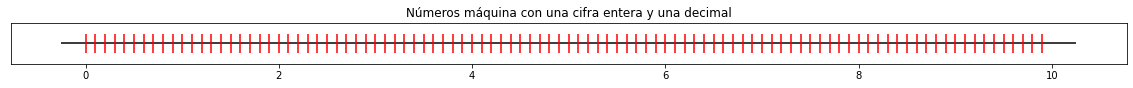

In [4]:
#Mostramos los números que se pueden almacenar
from matplotlib import pyplot as plt

numeros_maquina = [float(n) for n in S]
numeros_maquina.sort()
print(numeros_maquina)

#Creamos la figura
plt.figure(figsize=(20, 0.75))
#Dibujamos la recta real
plt.hlines(1, -0.25, 10.25, colors='black')
#Dibujamos los números máquina
plt.eventplot(numeros_maquina, colors='red', linelengths=0.5)
#Ocultamos el eje y
ax = plt.gca() #get current axis
ax.get_yaxis().set_visible(False)
plt.title('Números máquina con una cifra entera y una decimal')
plt.show()

¿Qué ocurrirá si en alguna operación obtenemos un número que no se encuentra en nuestro conjunto finito de números máquina? Una posible solución es aproximar dicho número al número máquina más cercano. Siguiendo con el ejemplo anterior que sólo podemos representar los cien números con una cifra entera y una decimal, si hiciéramos la operación $5.5 + 0.1/4$ cuyo resultado es $5.525$, tendríamos que almacenar el resultado como $5.5$. Fijémonos que aunque en la operación solo hemos utilizado números de nuestro conjunto finito el resultado está fuera del conjunto. Gráficamente el resultado se posicionaría de la siguiente forma:

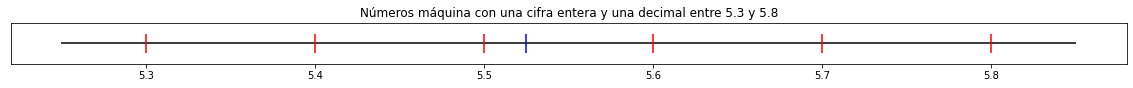

In [5]:
#Mostramos el ejemplo anterior gráficamente
subconjunto_num_maquina = [n for n in numeros_maquina if n > 5.2 and n < 5.9]

#Creamos la figura
plt.figure(figsize=(20, 0.75))
#Dibujamos la recta real
plt.hlines(1, 5.25, 5.85, colors='black')
#Dibujamos los números máquina
plt.eventplot(subconjunto_num_maquina, colors='red', linelengths=0.5)
#Dibujamos el resultado de la operación
plt.eventplot([5.525], colors='blue', linelengths=0.5)
#Ocultamos el eje y
ax = plt.gca() #get current axis
ax.get_yaxis().set_visible(False)
plt.title('Números máquina con una cifra entera y una decimal entre 5.3 y 5.8')
plt.show()

El gráfico anterior resulta de ampliar el espacio que hay entre 5.3 y 5.8. En rojo se marcan los números máquina que podemos representar en nuestro ordenador primitivo y en azul el resultado obtenido de la operación.

En la realidad, en lugar de tener un ordenador primitivo que solo es capaz de almacenar una cifra entera y una decimal, podemos guardar muchísimas más. Sin embargo, da igual la capacidad finita que tengamos que **siempre existirán más números en la recta real que no podemos representar que los que sí podemos**. De hecho, no solo es posible encontrar huecos entre los distintos números máquina, sino también a la derecha y a la izquierda del mayor y menor número máquina respectivamente.

### 2.2.- Representación binaria

Al problema de la finita capacidad de nuestra memoria, debemos añadirle el inconveniente de que, internamente, nuestro ordenador almacenará los números con la representación binaria (sistema numérico en el que todos los números se representan mediante las cifras 0 y 1 exclusivamente). De hecho, podemos distinguir dos tipos de números decimales en coma flotante (float):
- Precisión simple: utilizan 32 bits (cifras que pueden ser ceros o unos) para almacenar el valor.
- Doble precisión: utilizan 64 bits para almacenar el valor.

En Python existen otras representación (como la que utiliza 16 bits y se denomina *de media precisión*), pero las más comunes en los lenguajes de programación son las dos anteriores.

In [6]:
#Mostramos el mismo número (0.123456789121212121212) con distintas precisiones:
import numpy as np

a = np.array([0.123456789121212121212], dtype=np.float16)
print("16bit: ", a[0])

a = np.array([0.123456789121212121212], dtype=np.float32)
print("32bit: ", a[0])

a = np.array([0.123456789121212121212], dtype=np.float64)
print("64bit: ", a[0])

16bit:  0.1235
32bit:  0.12345679
64bit:  0.12345678912121212


Como se puede observar, son más precisos conforme se aumenta el número de bits que se utilizan para almacenarlos. Pero, como hemos dicho, el número no se guarda como se observa en el ejemplo anterior, sino que se guarda con números binarios como vemos a continuación:

In [7]:
!pip install bitstring

In [8]:
#Mostramos el mismo número (en negativo y en positivo) en binario con las distintas precisiones:
import bitstring
for longitud in [32, 64]:
    f1 = bitstring.BitArray(float=0.123456789121212121212, length=longitud)
    print(f1.bin)
    f1 = bitstring.BitArray(float=-0.123456789121212121212, length=longitud)
    print(f1.bin)

00111101111111001101011011101010
10111101111111001101011011101010
0011111110111111100110101101110100110111101111101010100110001101
1011111110111111100110101101110100110111101111101010100110001101


Si se observan las representaciones con detenimiento, veremos que cuando cambiamos el signo la representación binaria es la misma y lo único que varía es el primer bit (0 para positivos y 1 para negativos). En efecto, **el primer bit se corresponde con el signo del número**.

Tampoco se observa la coma en el número escrito en binario, ¿cómo sabe el ordenador dónde está la coma? Porque se utiliza **el formato estándar de representación** ([IEEE Storage Format](https://standards.ieee.org/ieee/754/6210/)), en el cual se representan los números como potencias: para el exponente se reservan los dígitos después del bit de signo (los 8 siguientes bits para precisión simple o los 11 siguientes para doble precisión) y los últimos para la mantisa o significado (los 23 últimos para precisión simple o los 52 últimos para doble precisión). La mantisa o significado son los dígitos significativos del número en notación científica.

Sin embargo, debido a este formato, encontramos que el cero posee dos representaciones binarias posibles: el -0 y el +0

In [9]:
#Vemos que hay dos representaciones binarias para 0
f1 = bitstring.BitArray(float=0., length=32)
print(f1.bin)
f1 = bitstring.BitArray(float=-0., length=32)
print(f1.bin)

00000000000000000000000000000000
10000000000000000000000000000000


Además de la curiosidad de poseer dos representaciones distintas para el 0, la representación binaria genera un problema adicional para almacenar ciertos números: puede ocurrir que **un número con un número finito de cifras decimales posea un número infinito de cifras decimales en su representación binaria**. Por ejemplo, el número decimal 0.1 tiene como representación binaria $0.0\overline{0011}$, lo cual significa que no se podrá almacenar internamente de manera exacta (es decir, 0.1 no es un número máquina).

In [10]:
#Vemos qué ocurre cuando introduzco 0.1 en Python
f = 0.1
f

0.1

Entonces, ¿por qué si almacenamos 0.1 en una variable y lo consultamos después me devuelve el valor exacto y no una aproximación? Porque Python, a partir de la versión 3.1, incluyó ciertos [cambios](https://docs.python.org/dev/whatsnew/3.1.html#other-language-changes) entre los que se encuentran la implementación y ejecución de un procesamiento del número almacenado antes de mostrarlo por pantalla, sin embargo, si le obligamos a mostrarnos el número con muchas cifras significativas veremos lo que realmente está almacenando:

In [11]:
#Vemos el verdadero valor que almacena internamente Python
#Mostramos 50 cifras significativas
format(f, '.50g')

'0.1000000000000000055511151231257827021181583404541'

In [12]:
#Mostramos 50 cifras significativas de 2 (número que se puede almacenar en binario)
format(2., '.50g')

'2'

Este hecho produce problemas como el que ocurre si comprobamos si 0.1 + 0.2 es igual a 0.3:

In [13]:
# Comprobamos la suma 0.1+0.2
0.1 + 0.2 == 0.3

False

In [14]:
#Vemos el resultado
0.1 + 0.2

0.30000000000000004

In [15]:
#Podemos encontrar muchos más ejemplos
print(1.1 + 2.2 == 3.3)
print('1.1 + 2.2 = ', 1.1 + 2.2)
print(0.2 + 0.2 + 0.2 == 0.6)
print('0.2 + 0.2 + 0.2 = ', 0.2 + 0.2 + 0.2)
print(1.2 + 2.4 + 3.6 == 7.2)
print('1.2 + 2.4 + 3.6 = ', 1.2 + 2.4 + 3.6)
print(0.1 + 0.2 <= 0.3)
print('0.1 + 0.2 = ', 0.1 + 0.2)
print(10.4 + 20.8 > 31.2)
print('10.4 + 20.8 = ', 10.4 + 20.8)
print(0.8 - 0.1 > 0.7)
print('0.8 - 0.1 = ', 0.8 - 0.1)

False
1.1 + 2.2 =  3.3000000000000003
False
0.2 + 0.2 + 0.2 =  0.6000000000000001
False
1.2 + 2.4 + 3.6 =  7.199999999999999
False
0.1 + 0.2 =  0.30000000000000004
True
10.4 + 20.8 =  31.200000000000003
True
0.8 - 0.1 =  0.7000000000000001


Cabe recordar que el error de representación de los decimales en coma flotante no es específico de Python, es un problema que se debe conocer (por si se necesitara trabajar con cierta precisión) y saber cómo manejar en cada lenguaje de programación. Para ver que es compartido por varios lenguajes, se puede visitar la página que ha creado Erik Wiffin en la que se muestra el resultado de evaluar `0.1 + 0.2` en múltiples lenguajes y que se llama: [0.30000000000000004.com](0.30000000000000004.com).

![](./images/panicoffice.gif)

### 2.3.- Redondeo
Como hemos visto, hay un número finito de números máquina y hay muchísimos "huecos" en la recta real de números que no podemos almacenar. Cuando se necesita trabajar con estos números no máquina que se encuentran entre dos números máquina, lo que se hace es aproximarlos por números máquina cercanos. Este proceso se denomina *redondeo*.

En coma flotante estándar, para cada número real están definidos cuatro tipos de rendodeo:
- Redondeo a la derecha (o por exceso): se toma el número máquina más cercano a la derecha (mayor) del número real.
- Redondeo a la izquierda (o por defecto): se toma el número máquina más cercano a la izquierda (menor) del número real.
- Redondeo a cero: se toma el número máquina más cercano a la izquierda cuando el número real es positivo y a la derecha cuando es negativo, es decir, se elige entre izquierda y derecha en función del número máquina que se encuentra entre 0 y el número real.
- Redondeo al más próximo: se eligen entre el número máquina qu está más cerca del número real, en caso de que estén a igual distancia se toma el que tenga el bit 23 de la mantisa a 0.

La opción más común es esta última, de hecho suele ser la opción por defecto en los ordenadores.

### 2.4.- Épsilon de la máquina
La primera cuestión que se nos plantea entonces es qué error se comete cuando en lugar de trabajar con un número real $x$ se trabaja, como es obligado, con su rendondeo. En términos absolutos, y manteniendo la notación, se tiene la siguiente cota del error de redonde absoluto:

Sea $r(x)$ el redondeo que se lleva a cabo del número $x$, $x_d$ el número máquina a la derecha de $x$ y $x_i$ el número máquina a la izquierda de $x$. Supongamos que trabajamos con números de tamaño de la mantisa de 23 bits (precisión simple), entonces el error absoluto es:
$$
\lvert r(x)-x\rvert\leq\frac{x_d-x_i}{2}=\frac{2^{-23}\cdot2^E}{2}=2^{-24}\cdot2^E
$$
Mientras que, en términos relativos, una cota del error de redondeo relativo es:
$$
\left\lvert\frac{r(x)-x}{x}\right\rvert\leq\frac{2^{-24}\cdot2^E}{2^E}=2^{-24}
$$

El valor de $2^{-24}$ obtenido es, exactamente, la mitad de la distancia entre 1 y el siguiente número máquina. Esta distancia se denomina **precisión o épsilon de la máquina** y se denota por *eps*. Así, pues, trabanjando en coma flotante estándar se verifica que el error de redondeo es menor que $\text{eps}/2$ utilizando el redondeo al más próximo. En términos de representación decimal quiere decir que el redondeo de $x$ tendrá alrededor de 7 cifras significativas correctas. En doble precisión el épsilon de la máquina es $2^{-52}$ y el redondeo de un número tendrá un mínimo de 15 cifras significativas exactas. Calculemos el épsilon de la máquina en Python:

In [16]:
#Podemos calcular el épsilo llevando a cabo la operación 7/3 - 4/3 -1 (ya que la primera resta obtiene
# el siguiente número máquina al número 1 debido a las representaciones binarias de ambas fracciones)
7./3 - 4./3 -1

2.220446049250313e-16

In [17]:
#Para saber la aproximación de cualquier número real podemos usar la función as_integer_ratio de los float
#Esta función sí es específica de Python
numerador, denominador = (0.1).as_integer_ratio()
print(f'0.1 ≈ {numerador}/{denominador} ≈ {format(numerador/denominador, ".50g")}')
numerador/denominador == 0.1

0.1 ≈ 3602879701896397/36028797018963968 ≈ 0.1000000000000000055511151231257827021181583404541


True

In [18]:
#Hagámoslo con el 2
numerador, denominador = (2).as_integer_ratio()
print(f'2 ≈ {numerador}/{denominador} ≈ {format(numerador/denominador, ".50g")}')

2 ≈ 2/1 ≈ 2


In [19]:
#También podemos hallar épsilon calculando el siguiente número máquina después de uno
#Para eso usamos la función next_plus de la biblioteca decimal
from decimal import *
f = Decimal(1)
print(f'El siguiente número máquina de {f} es: {f.next_plus()}')

El siguiente número máquina de 1 es: 1.000000000000000000000000001


In [20]:
#Calculamos el épsilon
f.next_plus() - f

Decimal('1E-27')

In [21]:
#numpy también tiene su forma de informarnos del épsilo de la máquina
print(np.finfo(float).eps)
print(np.finfo(np.float32).eps)

2.220446049250313e-16
1.1920929e-07


Pero, ¿cuál de todos ellos es realmente el épsilon de la máquina? Obtenemos resultados distintos debido a que utilizamos diferentes librerías que realizan los cálculos de diferentes maneras. Como vemos la librería *decimal* parece tener una precisión mucho mayor. Para conocer el épsilon de la máquina debemos consultar los parámetros del sistema:

In [22]:
#Consultamos los valores del sistema
import sys
print('\n'.join(str(sys.float_info).split(', ')))

sys.float_info(max=1.7976931348623157e+308
max_exp=1024
max_10_exp=308
min=2.2250738585072014e-308
min_exp=-1021
min_10_exp=-307
dig=15
mant_dig=53
epsilon=2.220446049250313e-16
radix=2
rounds=1)


Entre otros datos, vemos el épsilon de la máquina (utilizando float) y el número de bits de la mantisa (53).

### 2.5.- Desbordamiento
Como vimos en los ejemplos prácticos en los que solo contábamos con un ordenador capaz de representar 100 números, no solo encontrábamos elementos del conjunto de los reales no representables entre dos números, sino también a la derecha y a la izquierda del mayor y menor número máquina. Es decir, como tenemos un conjunto finito de números máquina, existirá uno que sea mayor que todos los demás y otro que sea el menor de todos, pero hay infinitos reales más grandes y más pequeños, respectivamente. A este fenómeno de tratar un número real mayor que el máximo representable o menor que el mínimo se le conoce como **desbordamiento por exceso**. La representación estándar en coma flotante trata el desbordamiento como algo excepcional asignándole el valor $\infty$ (o $-\infty$ para el caso de un número menor que el mínimo) siempre que tengan sentido las operaciones (por ejemplo $1/\infty=0$).

In [23]:
#Miramos cuál es el valor máximo y mínimo del sistema
print('\n'.join(str(sys.float_info).split(', ')))

sys.float_info(max=1.7976931348623157e+308
max_exp=1024
max_10_exp=308
min=2.2250738585072014e-308
min_exp=-1021
min_10_exp=-307
dig=15
mant_dig=53
epsilon=2.220446049250313e-16
radix=2
rounds=1)


In [24]:
#Vemos qué valor le asigna si le damos un número mayor:
1.797694e308

inf

In [25]:
#Probamos en negativo
-1.797694e308

-inf

In [26]:
#Vemos que el valor máximo sí lo muestra
1.7976931348623157e+308

1.7976931348623157e+308

In [27]:
#Probamos a operar con el infinito:
print(1.8e308 + 1)
print(1.8e308 * 2)
print(1.8e308 / 2)
print(1.8e308 - 1.7e308)
print(1/1.8e308)

inf
inf
inf
inf
0.0


In [28]:
#Generamos indeterminaciones
print(1.8e308/-1.8e308) #infinito / infinito
print(1**1.8e308) # 1^infinito
print(0**1.8e308) # 0^infinito
print(1.8e308**0) # infinito^0
print(0*1.8e308) # 0 * infinito
print(1.8e308*0) # infinito * 0
print(1.8e308 - 1.8e308) # infinito - infinito

nan
1.0
0.0
1.0
nan
nan
nan


### 2.6.- Ejemplo de error de redondeo

![](./images/horrible-avengers.gif)

Como hemos visto, constatemente estaremos generando errores de redondeo debido a la capacidad finita de la memoria y a la representación binaria de los números. Para minimizarla lo máximo posible, conviene tratar de simplificar las expresiones matemáticas todo lo que se pueda evitando también el fenómeno de cancelación (antes observamos que, aunque $7/3 - 4/3 -1 = 0$ no se anulaba por completo). Veamos un ejemplo:

Tenemos la siguiente función:
$$
f_1(x) = \frac{x^4-x^3-x+1}{(x-1)^2}
$$
que, con valores distintos a 1, puede simplificarse (obteniendo las raíces del numerador) en la siguiente expresión:
$$
f_2(x) = \frac{(x-1)^2(x^2+x+1)}{(x-1)^2}=x^2+x+1
$$
Veamos qué resultados obtenemos al aplicar las distintas expresiones con valores cercanos a 1 (un poco mayores que 1):

In [29]:
#Implementamos f1
def f1(x):
    return (x**4-x**3-x+1)/((x-1)**2)

#Implementamos f2
def f2(x):
    return x**2+x+1

#Generamos 20 números entre (1, 1.00000002] (sin incluir el 1)
nparray = np.linspace(1.00000002, 1., 20, endpoint=False)

#Evaluamos las expresiones para cada número
for f in nparray:
    print(f'x = {format(f, ".20g").ljust(23)} | f1(x) = {format(f1(f), ".20g").ljust(23)}  | f2(x) = {format(f2(f), ".20g")}')

x = 1.0000000200000001005   | f1(x) = 3.330669040403849035     | f2(x) = 3.0000000600000005235
x = 1.0000000190000000178   | f1(x) = 3.075410034765179379     | f2(x) = 3.0000000570000002753
x = 1.0000000180000001571   | f1(x) = 3.4266142137365704912    | f2(x) = 3.0000000540000009153
x = 1.0000000170000000743   | f1(x) = 3.0732817021953264813    | f2(x) = 3.000000051000000667
x = 1.0000000159999999916   | f1(x) = 3.4694469556059415183    | f2(x) = 3.0000000480000004188
x = 1.0000000150000001309   | f1(x) = 2.9605946806683967054    | f2(x) = 3.0000000450000006147
x = 1.0000000140000000481   | f1(x) = 2.2657612591625513332    | f2(x) = 3.0000000420000003665
x = 1.0000000129999999654   | f1(x) = 3.9416202267502438161    | f2(x) = 3.0000000390000001183
x = 1.0000000120000001047   | f1(x) = 3.0839527923629135309    | f2(x) = 3.0000000360000003141
x = 1.000000011000000022    | f1(x) = 1.835079372216853022     | f2(x) = 3.0000000330000000659
x = 1.0000000099999999392   | f1(x) = 4.44089215247

Como vemos, con la función $f_1$ para números cercanos a 1 (recordemos que estos números no producen ninguna indeterminación), no acabamos de aproximar adecuadamente el resultado. Mientras que la función $f_2$ no se encuentra con estos problemas. Esto se debe al fenómeno de cancelación comentado anteriormente que debemos tratar de evitar.

### 2.7.- Propagación del error

![](./images/worse-tarzan.gif)

Como hemos visto, solo para almacenar un número real ya se comete un pequeño error. A continuación, al operar con ellos no solo se producen tantos errores como operandos, sino tras llevar a cabo cada una de las operaciones, se vuelve a cometer un error de redondeo. Si, por ejemplo, evaluamos $a+b+c$ siendo $a$, $b$, y $c$ tres números reales, tendremos los errores de almacenar los tres números, luego el error de redondeo de $a+b$ y, por último, el error de redondeo de $(a+b) + c$ (y no estamos teniendo en cuenta el error en la medición del dato). De esta forma si pensamos en un algoritmo que involucre una gran cantidad de operaciones elementales las perspectivas pueden parecer no muy buenas. Parece claro que debemos estudiar cuánto influye la propagación del error en el resultado final del problema. Dos son los principales conceptos ligados a este estudio:
- **Condicionamiento**: mide la influencia que tendría en el resultado eventuales errores en los datos en el caso ideal de que se pudiese trabajar con aritmética exacta. Está ligado, por tanto, al problema en sí y no depende del algoritmo.
- **Estabilidad**: está relacionada con la influencia que tiene en los resultados finales la acumulación de los errores que se producen en las sucesivas operaciones elementales que se llevan a cabo para resolver el problema.

Ambos conceptos resultan bastante difíciles de analizar. Veamos un ejemplo de condicionamiento diseñado por el matemático R. S. Wilson:

In [30]:
#Resolvamos un sistema lineal de la forma Ax = b (profundizaremos en esto más adelante)
#Datos del ejemplo:
A = [[10, 7, 8, 7],
    [7, 5, 6, 5],
    [8, 6, 10, 9],
    [7, 5, 9, 10]]

#La matriz con pequeños cambios la copiamos de la matriz original e introducimos los cambios
A_aprox = [[10, 7, 8.1, 7.2],
    [7.08, 5.04, 6, 5],
    [8, 5.98, 9.89, 9],
    [6.99, 4.99, 9, 9.98]]

b = [32, 23, 33, 31]

b_aprox = [32.1, 22.9, 33.1, 30.9]

In [31]:
#Veamos las soluciones de los sistemas
#Mostramos el sistema:
def print_sistema(A, b):
    ecuaciones = ''
    incognitas = ['x', 'y', 'z', 't']
    for i in range(4):
        for j in range(4):
            ecuaciones += f'{A[i][j]}{incognitas[j]} '
            if j != 3:
                ecuaciones += '+ '
            else:
                ecuaciones += '= '
        ecuaciones += f'{b[i]}\n'
    print(ecuaciones)

#Mostramos la solución dada del sistema
def print_solucion(sol):
    solucion = ''
    incognitas = ['x', 'y', 'z', 't']
    for i in range(4):
        solucion += f'{incognitas[i]} = {format(sol[i], ".7g")}'
        if i != 3:
            solucion += ', '
    print(solucion)

#Ax = b
print_sistema(A, b)
print('Solución del sistema:')
print_solucion(np.linalg.solve(A, b))
#A_aprox x = b
print('\n--------------------\n')
print_sistema(A_aprox, b)
print('Solución del sistema introduciendo pequeños errores en A:')
print_solucion(np.linalg.solve(A_aprox, b))
#Ax = b_aprox
print('\n--------------------\n')
print_sistema(A, b_aprox)
print('Solución del sistema introduciendo pequeños errores en b:')
print_solucion(np.linalg.solve(A, b_aprox))

10x + 7y + 8z + 7t = 32
7x + 5y + 6z + 5t = 23
8x + 6y + 10z + 9t = 33
7x + 5y + 9z + 10t = 31

Solución del sistema:
x = 1, y = 1, z = 1, t = 1

--------------------

10x + 7y + 8.1z + 7.2t = 32
7.08x + 5.04y + 6z + 5t = 23
8x + 5.98y + 9.89z + 9t = 33
6.99x + 4.99y + 9z + 9.98t = 31

Solución del sistema introduciendo pequeños errores en A:
x = -81, y = 137, z = -34, t = 22

--------------------

10x + 7y + 8z + 7t = 32.1
7x + 5y + 6z + 5t = 22.9
8x + 6y + 10z + 9t = 33.1
7x + 5y + 9z + 10t = 30.9

Solución del sistema introduciendo pequeños errores en b:
x = 9.2, y = -12.6, z = 4.5, t = -1.1


Ante estos resultados, podemos decir que **este problema está mal condicionado**, o lo que es lo mismo, ante pequeñas perturbaciones en los datos, obtendremos resultados radicalmente diferentes.

## 3.- Soluciones
![](./images/aleluya.gif)

En esta sección veremos distintas soluciones a los diferentes problemas que hemos ido viendo. Antes de introducir las distintas formas que hay de minimizar el impacto de las limitaciones de nuestros ordenadores, **es importante pensar si realmente necesitamos una solución y la precisión con la que queremos trabajar**. En muchas ocasiones, no se requiere de tanta precisión o, simplemente, basta con llevar a cabo algún tipo de ajuste en los datos de entrada. Por ejemplo, si estamos trabajando con unidades de medida, en lugar de utilizar medidas como 0.007 m, podemos tratar de cambiar la magnitud de nuestros datos a, por ejemplo, milímetros. Por supuesto, para ello deberemos estudiar cuál es el mayor número que alcanzaremos con nuestro problema y cuál es el menor, así como las necesidades del problema. Quizás, para llevar a cabo un estudio estadístico con el fin de describir un conjunto de datos no necesitamos una gran precisión y podemos asumir el error cometido al evaluar las operaciones. Esto, dependerá del problema y sus necesidades, pero como se ha comentado, es importante valorar qué precisión realmente necesitamos y qué solución se adecúa más a nuestro problema.

### 3.1.- Display
Es muy común que podamos asumir el pequeño error que se comete en las distintas operaciones y simplemente necesitamos mostrar una solución por pantalla razonble (en lugar de visualizar el número 0.30000000000000004 que se muestra al operar 0.1 + 0.2). Para ello hemos visto diferentes formas de mostrar estos resultados (téngase en cuenta que estas soluciones **solo arreglan el problema de visualización, pero internamente se seguirán arrastrando los errores**):

In [32]:
#Utilizando format(float, número de cifras significativas)
print(format(0.1 + 0.2, ".5g"))

0.3


In [33]:
#Utilizando f-strings
print(f'{0.1 + 0.2: .5f}')

 0.30000


In [34]:
#Podemos elegir con las f-strings el número de decimales 
# (el .5 anterior indica el número de decimales que queremos mostrar)
print(f'{0.1 + 0.2: .1f}')

 0.3


In [35]:
#Para obtener la parte entera simplemente basta con transformar el float a int
int(4.231234)

4

In [36]:
#¡Cuidado! Hacer cast de tipo float a entero hace un truncamiento, no un redondeo
int(4.99923)

4

In [37]:
#Se puede utilizar la función round indicando el número de decimales
round(4.51231, 3)

4.512

Con la última solución hay que tener cuidado, en el sentido de que todos esperaríamos que si tenemos el número 2.675 se redondee con dos decimales a 2.68, sin embargo, recordemos que cuando un número se encuentra a la misma distancia de sus dos números máquina más cercanos, dependía del valor de un dígito binario. Esto mismo ocurre con la función `round`:

In [38]:
print(round(2.5))
print(round(3.5))
print(round(2.675, 2))
print(round(2.665, 2))

2
4
2.67
2.67


La función `round`, aproxima como se espera excepto si se encuentra en medio camino entre ambos posibles redondeos, en cuyo caso, acudirá a su representación binaria y se redondeará al valor más cercano con un dígito menos significativo par.

También existen las soluciones relacionadas con el truncamiento:

In [39]:
from math import trunc
#Se elimina la parte decimal, igual que al transformarlo a entero
trunc(4.14332)

4

En caso de que queramos seleccionar el número de decimales a truncar tendríamos que implementar nuestra propia función:

In [40]:
def truncar(real, num_decimales = 0):
    factor = 10**num_decimales
    real *= factor
    real = trunc(real)
    return real/factor

truncar(4.9999, 2)

4.99

Estas dos últimas soluciones, como las demás, no arreglarían el problema de aproximación del número 0.1, pero sí probablemente resolvería muchos problemas de almacenamiento de números más complicados. Veamos que no sigue sin ayudarnos a la hora de comparar 0.1 + 0.2 con 0.3:

In [41]:
round(.1, 1) + round(.2, 1) == round(.3, 1)

False

In [42]:
#Sin embargo, podría servirnos si aproximamos los resultaod sd elas operacioness
round(.1 + .2, 1) == round(.3, 1)

True

### 3.2.- Comparación de números
Quizás no nos interesa realmente ser capaces de almacenar y obtener una gran precisión en el tratamiento numérico, sino que simplemente queremos obtener resultados razonables al hacer comparaciones como `0.1 + 0.2 == 0.3` y obtener `True` como resultado. Una opción es utilizar el redondeo o truncamiento vistos en la sección anterior y aplicarlo a cada resultado de la operación. Sin embargo, esto resulta tedioso, ineficiente y hace menos legible el código. Para comparar números utilizaremos la función `isclose()` en lugar de los operadores `==`, `>=` o `<=` con los floats:

In [43]:
from math import isclose
isclose(0.1 + 0.2, 0.3)

True

¿Qué hace realmente la función `isclose`? Comprueba si el segundo argumento se parece, de forma aceptable, al segundo argumento. Pero, ¿qué significa exactamente "se parece, de forma aceptable"? La idea se basa en comprobar **la distancia** entre el primer argumento y el segundo (la distancia se calcula como el error absoluto de los valores):

In [44]:
error_absoluto(0.1+0.2, 0.3)

5.551115123125783e-17

Si el error absoluto es más pequeño que un valor porcentual de la cantidad del primer argumento y del segundo (o lo que es lo mismo, se encuentra un error relativo bajo), entonces el primer argumento se considera lo suficientemente "cercano" al segundo argumento como para afirmar "que son iguales". Este porcentaje se denomina **tolerancia relativa** y por defecto tiene el valor de `1e-9` (o lo que es lo mismo, $10^{-9}$). En otras palabras, dos valores $a$ y $b$ se considerarán "cercanos" cuando:
$$
\lvert a-b\rvert<\text{tol}\cdot\max\left(\lvert a\rvert, \lvert b\rvert\right)
$$
siendo $\text{tol}$ la tolerancia relativa.

Cuando la tolerancia relativa posee su valor por defecto, garantiza la igualdad en las primeras 9 cifras decimales, pero podemos cambiar la tolerancia para que sea más preciso o menos:

In [45]:
#Tolerancia relativa de 1e-20
isclose(0.1 + 0.2, 0.3, rel_tol=1e-20)

False

In [46]:
#Tolerancia relativa de dos decimales
isclose(3.253, 3.259, rel_tol=1e-2)

True

Hay un problema cuando $a$ o $b$ es cero y la tolerancia relativa se corresponde con un número inferior a 1. En este caso, da igual cuán cerca esté el otro número de cero, nunca se cumplirá la condición necesaria. En este caso se debe utilizar una **tolerancia absoluta**:

In [47]:
a = 0
b = 1e-10
tol = 1e-9
#Si usamos la tolerancia relativa fallará siempre independientemente del valor de b
error_absoluto(a,b) < tol * max(abs(a), abs(b))

False

In [48]:
#Si usamos una tolerancia absoluta esto no ocurrirá
error_absoluto(a,b) < tol

True

Esta comprobación la realiza automáticamente el método `isclose` e incluye el parámetro de tolerancia absoluta que por defecto es 0.0:

In [49]:
#Probamos con el valor por defecto de tolerancia absoluta
isclose(a, b)

False

In [50]:
#Cambiamos el valor
isclose(a, b, abs_tol=tol)

True

¿Y qué ocurre si queremos hacer comparaciones de tipo `<=`, `<`, `>=` o `>`? Entonces usaremos `isclose` y, a continuación, en función del resultado, ejecutaremos la comparación estricta:

In [51]:
#Definimos funciones menorque y menoroigual
def menorque(a, b):
    return not(isclose(a,b)) and a < b

def menoroigual(a, b):
    return isclose(a, b) or a < b

In [52]:
#Probemos las comparaciones que antes no conseguíamos realizar correctamente:
comparaciones = [(1.1 + 2.2, 3.3, '=='), (0.2 + 0.2 + 0.2, 0.6, '=='), (1.2 + 2.4 + 3.6, 7.2, '=='),
                (0.1 + 0.2, 0.3, '<='), (31.2, 10.4 + 20.8, '<'), (0.7, 0.8 - 0.1, '<')]
#Comparamos el resultado anterior con el nuevo utilizando las nuevas funciones:
for a, b, op in comparaciones:
    if op == '==':
        print(f'Antes: {a == b} | Ahora {isclose(a,b)}')
    elif op == '<=':
        print(f'Antes: {a <= b} | Ahora {menoroigual(a,b)}')
    else:
        print(f'Antes: {a < b} | Ahora {menorque(a,b)}')

Antes: False | Ahora True
Antes: False | Ahora True
Antes: False | Ahora True
Antes: False | Ahora True
Antes: True | Ahora False
Antes: True | Ahora False


![](./images/yay-friends.gif)

En `numpy` existen alternativas a la función `isclose` de la librería math:

In [53]:
# El valor por defecto de la tolerancia relativa es de 1e-05  y de la absoluta 1e-08
np.allclose([0.1 + 0.2,1e-7], [0.3, 1e-8])

False

In [54]:
np.allclose([0.1 + 0.2, 1e-8], [0.3, 1e-9])

True

In [55]:
#También está la función is close
np.isclose([0.1 + 0.2,1e-7], [0.3, 1e-8])

array([ True, False])

### 3.3.- Precisión en el almacenamiento y en las operaciones
Antes de comenzar con las soluciones que nos permiten obtener mayor precisión en el almacenamiento de los números y en sus operaciones, debemos reincidir en la necesidad de crítica de cara al problema al que nos estemos enfrentando para saber si realmente necesitamos este tipo de soluciones y si se adaptan adecuadamente a las características de nuestro programa. Hay que tener en cuenta que aumentar la precisión en el almacenamiento conlleva un aumento en el tamaño de las variables para guardar el mismo valor que antes se almacenaba de manera "más ligera". Por otro lado, el aumento de la precisión en las operaciones con coma flotante, conlleva un aumento en el tiempo de ejecución del algoritmo. Por ese motivo, conviene recordar que antes de implementarla, es recomendable evaluar si es necesaria una solución de este tipo. Por ejemplo, si estamos gestionando un sistema de almacenamiento Big Data y los valores que guardamos no requieren esta precisión, conviene evitar este tipo de implementaciones, ya que lo único que se conseguirá será aumentar excesivamente los costes de almacenamiento de los datos.

Existen dos módulos en Python que ofrecen una precisión casi absoluta para aquellas situaciones en las que usar el tipo `float` no resulta adecuado:

#### 3.3.1.- Decimal
El tipo `Decimal` puede almacenar valores decimales con anta precisión como necesites. Por defecto, garantiza la exactitud de 28 cifras significativas, pero es completamente editable. Se suele utilizar a la hora de trabajar con dinero o tipos de interés.

In [56]:
#Evaluamos la suma 0.1 + 0.2
from decimal import Decimal

Decimal("0.1") + Decimal('0.2')

Decimal('0.3')

In [57]:
#Calculamos 1/7 con 28 cifras significativas exactas:
Decimal(1) / Decimal(7)

Decimal('0.1428571428571428571428571429')

In [58]:
#Cambiemos la precisión
from decimal import getcontext
getcontext().prec = 6  # Usa 6 cifras significativas
Decimal(1) / Decimal(7)

Decimal('0.142857')

In [59]:
#Es posible también obtener el valor exacto almacenado en un float
Decimal.from_float(0.1)

Decimal('0.1000000000000000055511151231257827021181583404541015625')

In [60]:
#Lo anterior se puede simplificar como
Decimal(0.1)

Decimal('0.1000000000000000055511151231257827021181583404541015625')

In [61]:
#Con el tipo Decimal se puede operar igual que con los float:
data = list(map(Decimal, '1.34 1.87 3.45 2.35 1.00 0.03 9.25'.split()))
max(data)

Decimal('9.25')

In [62]:
min(data)

Decimal('0.03')

In [63]:
sorted(data)

[Decimal('0.03'),
 Decimal('1.00'),
 Decimal('1.34'),
 Decimal('1.87'),
 Decimal('2.35'),
 Decimal('3.45'),
 Decimal('9.25')]

In [64]:
sum(data)

Decimal('19.29')

In [65]:
data[0] * 5

Decimal('6.70')

In [66]:
#También te permite calcular la raíz cuadrada
Decimal(2).sqrt()

Decimal('1.414213562373095048801688724')

In [67]:
#La función exponencial
Decimal(1).exp()

Decimal('2.718281828459045235360287471')

In [68]:
#El logaritmo neperiano
Decimal('10').ln()

Decimal('2.302585092994045684017991455')

In [69]:
#El logaritmo en base 10
Decimal('10').log10()

Decimal('1')

In [70]:
#Calculamos el cuadrado de la raíz de dos
print((2 ** 0.5)**2)
print((Decimal('2') ** Decimal('0.5')) ** Decimal('2'))

2.0000000000000004
1.999999999999999999999999999


Para continuar profundizando acerca de las funcionalidades y detalles del módulo `Decimal` de Python consúltese la [documentación](https://docs.python.org/3/library/decimal.html).

#### 3.3.2.- Fraction
El tipo `Fraction` permite almacenar números racionales de manera exacta y supera los problemas de error de representación que presentan los números en coma flotante.

In [71]:
#Resolvemos el problema de 0.1 + 0.2 con Fraction
from fractions import Fraction
Fraction(1, 10)

Fraction(1, 10)

In [72]:
Fraction(1,10) + Fraction(2,10) == Fraction(3, 10)

True

In [73]:
#Simplifica automáticamente las fracciones
Fraction(16, -10)

Fraction(-8, 5)

In [74]:
#Interpreta correctamente las cadenas de caracteres
Fraction(' -3/7 ')

Fraction(-3, 7)

In [75]:
#Incluso transforma números decimales
Fraction('-.125')

Fraction(-1, 8)

In [76]:
#Al igual que Decimal, también te da el valor exacto de float
Fraction(0.1)

Fraction(3602879701896397, 36028797018963968)

In [77]:
#Opera correctamente con las fracciones
Fraction(3,7) + Fraction(4, 9)

Fraction(55, 63)

In [78]:
Fraction(3,7) * Fraction(5, 4)

Fraction(15, 28)

In [79]:
Fraction(3, 7)**Fraction(1,2)

0.6546536707079771

Si se quieren conocer más detalles del módulo `Fraction` de Python se puede consultar la [documentación](https://docs.python.org/3/library/fractions.html#module-fractions)